In [81]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sys.path.append(os.path.abspath(".."))
from common import common

In [16]:
%run ../datasets/thyroid.ipynb

## 1. Understand the Structure of the Data
* Inspect data types of each column
* Check dimensions of the dataset
* View initial records

In [24]:
all_df, main_labels, config = get_thyroid_df()

Normal class:  0    -
Name: target, dtype: object


In [30]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9172 entries, 0 to 9171
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  9172 non-null   int64  
 1   sex                  8865 non-null   object 
 2   on_thyroxine         9172 non-null   object 
 3   query_on_thyroxine   9172 non-null   object 
 4   on_antithyroid_meds  9172 non-null   object 
 5   sick                 9172 non-null   object 
 6   pregnant             9172 non-null   object 
 7   thyroid_surgery      9172 non-null   object 
 8   I131_treatment       9172 non-null   object 
 9   query_hypothyroid    9172 non-null   object 
 10  query_hyperthyroid   9172 non-null   object 
 11  lithium              9172 non-null   object 
 12  goitre               9172 non-null   object 
 13  tumor                9172 non-null   object 
 14  hypopituitary        9172 non-null   object 
 15  psych                9172 non-null   o

In [26]:
all_df.shape

(9172, 31)

In [27]:
all_df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


## 2. Data Cleaning Check
* Check for null/missing values
* Check for wrong values
* Drop unnecessary columns

In [28]:
all_df.isnull().sum()

age                       0
sex                     307
on_thyroxine              0
query_on_thyroxine        0
on_antithyroid_meds       0
sick                      0
pregnant                  0
thyroid_surgery           0
I131_treatment            0
query_hypothyroid         0
query_hyperthyroid        0
lithium                   0
goitre                    0
tumor                     0
hypopituitary             0
psych                     0
TSH_measured              0
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              0
TT4                     442
T4U_measured              0
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              0
TBG                    8823
referral_source           0
target                    0
patient_id                0
dtype: int64

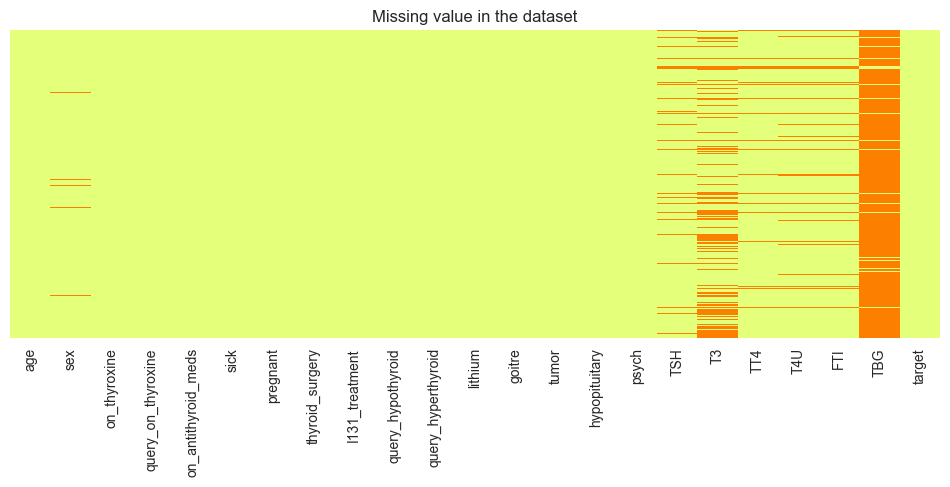

In [51]:
common.show_missing_values(all_df)

In [69]:
for col in all_df.columns:
    print(all_df[col].value_counts())
    print("--------------------------------")

age
60       209
62       208
72       207
59       201
61       192
        ... 
3          2
455        1
65511      1
65512      1
65526      1
Name: count, Length: 100, dtype: int64
--------------------------------
sex
F    6073
M    2792
Name: count, dtype: int64
--------------------------------
on_thyroxine
f    7932
t    1240
Name: count, dtype: int64
--------------------------------
query_on_thyroxine
f    9019
t     153
Name: count, dtype: int64
--------------------------------
on_antithyroid_meds
f    9056
t     116
Name: count, dtype: int64
--------------------------------
sick
f    8828
t     344
Name: count, dtype: int64
--------------------------------
pregnant
f    9065
t     107
Name: count, dtype: int64
--------------------------------
thyroid_surgery
f    9038
t     134
Name: count, dtype: int64
--------------------------------
I131_treatment
f    9003
t     169
Name: count, dtype: int64
--------------------------------
query_hypothyroid
f    8542
t     630
Name: coun

In [70]:
all_df.drop(['TSH_measured','T3_measured','TT4_measured','T4U_measured','FTI_measured','TBG_measured','referral_source','patient_id'],axis=1 ,inplace=True)

KeyError: "['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'referral_source', 'patient_id'] not found in axis"

## 3. Summary Statistics
* Mean, median, min, max, percentiles
* Understand data distribution for numerical features
* Check for outliers

In [43]:
all_df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,9172.000000,8330.000000,6568.000000,8730.000000,8363.000000,8370.000000,349.000000
mean,73.555822,5.218403,1.970629,108.700305,0.976056,113.640746,29.870057
std,1183.976718,24.184006,0.887579,37.522670,0.200360,41.551650,21.080504
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,0.100000
25%,37.000000,0.460000,1.500000,87.000000,0.860000,93.000000,21.000000
50%,55.000000,1.400000,1.900000,104.000000,0.960000,109.000000,26.000000
75%,68.000000,2.700000,2.300000,126.000000,1.065000,128.000000,31.000000
max,65526.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000


In [76]:
# Drop rows with unrealistic age
all_df = all_df[all_df['age'] < 100]

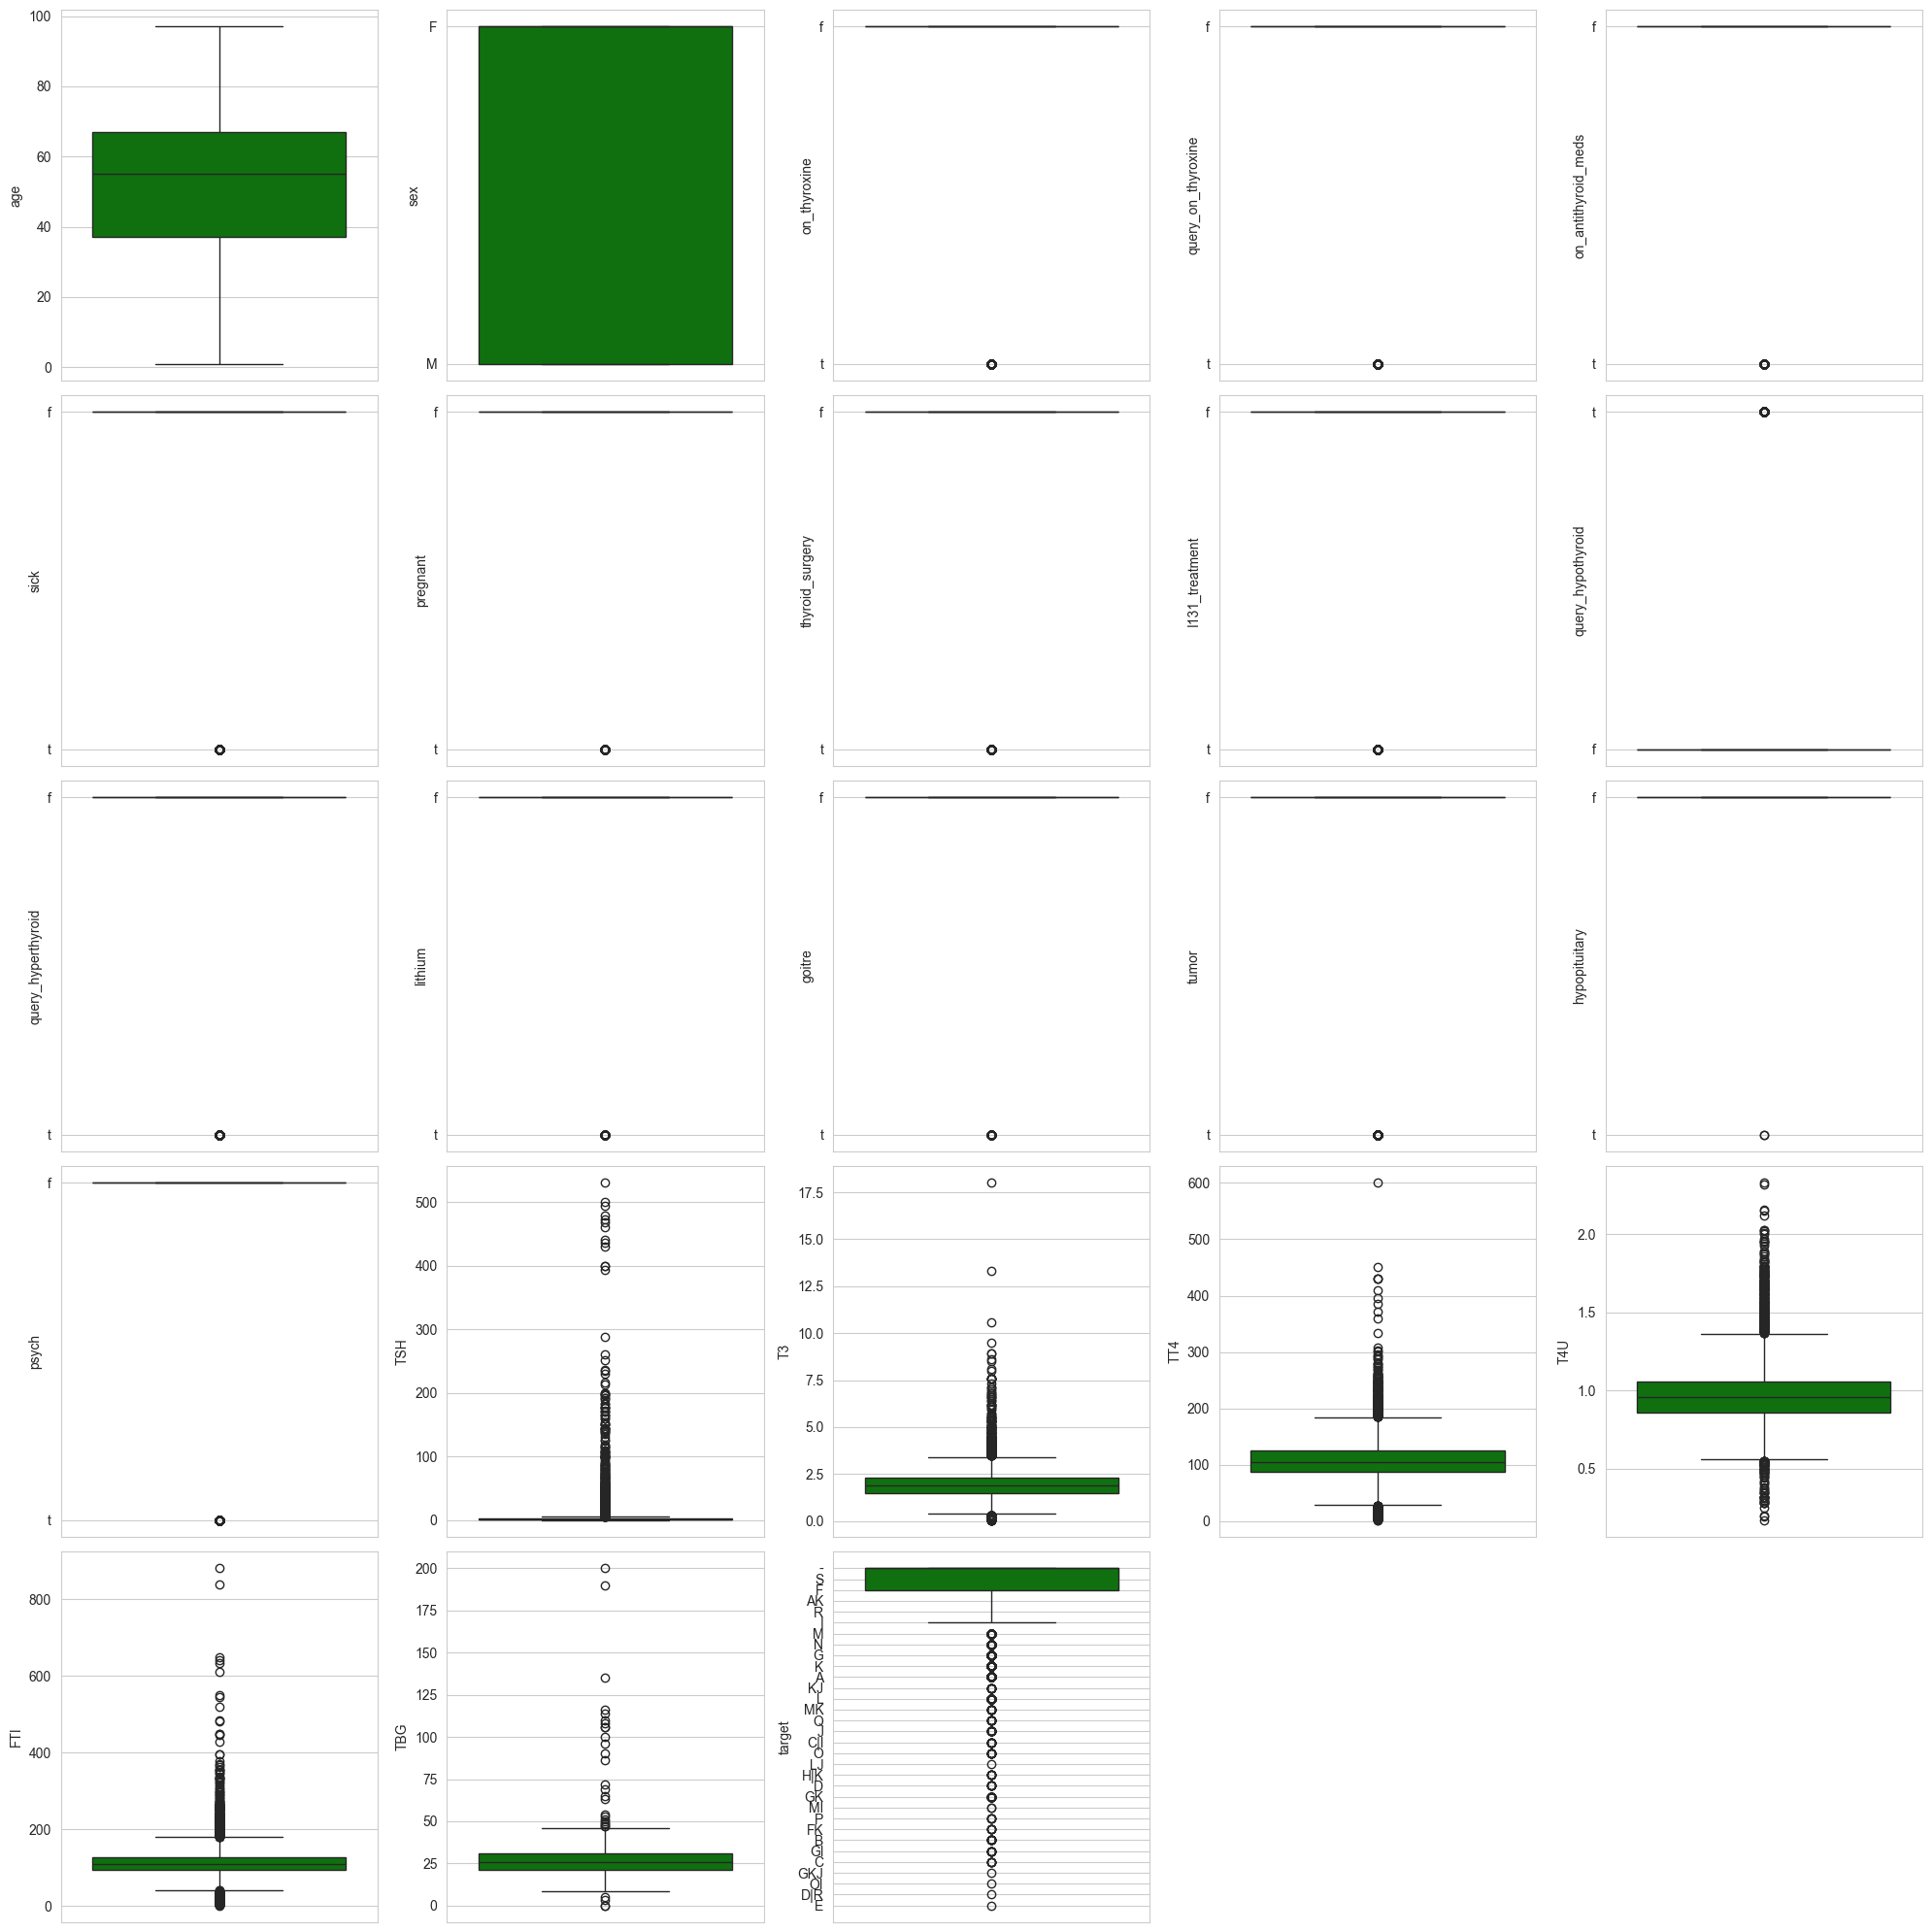

In [80]:
common.show_boxplots(all_df)

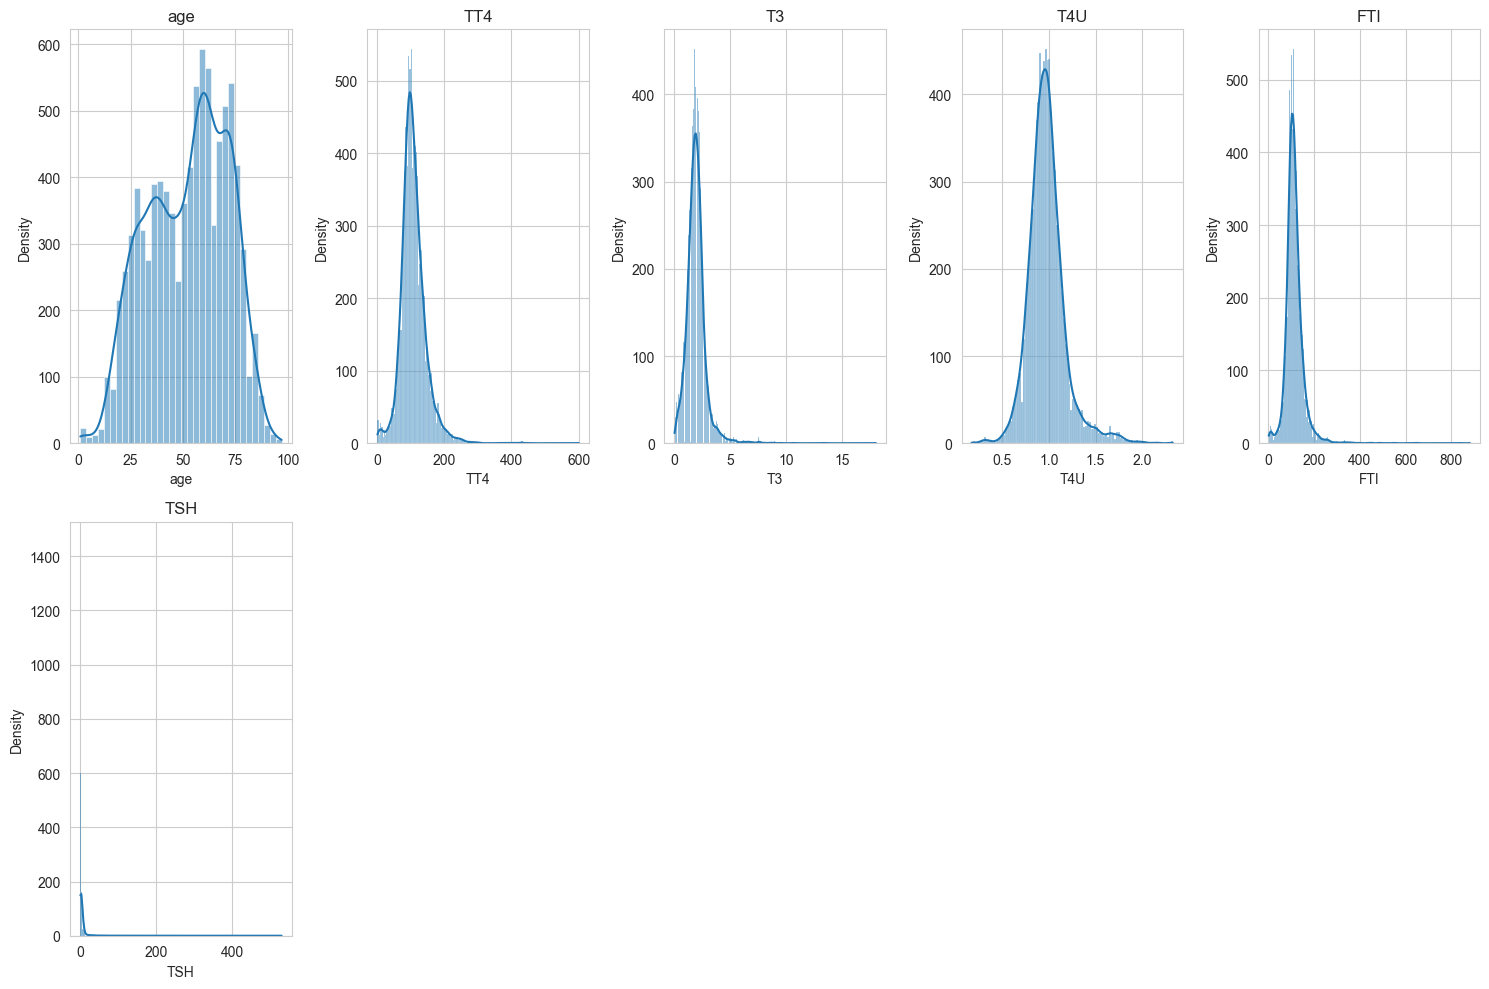

In [79]:
columns_to_plot_distribution = ['age', 'TT4', 'T3', 'T4U', 'FTI', 'TSH']
num_df = all_df.loc[:, columns_to_plot_distribution]
common.show_distribution_graph(num_df, columns_to_plot_distribution)

## 5. Univariate Analysis (Single Variable)
* Categorical variables:
    * Frequency distribution
    * Bar plots or pie charts.
* Numerical variables:
    * Histograms or box plots.
    * Distribution plots

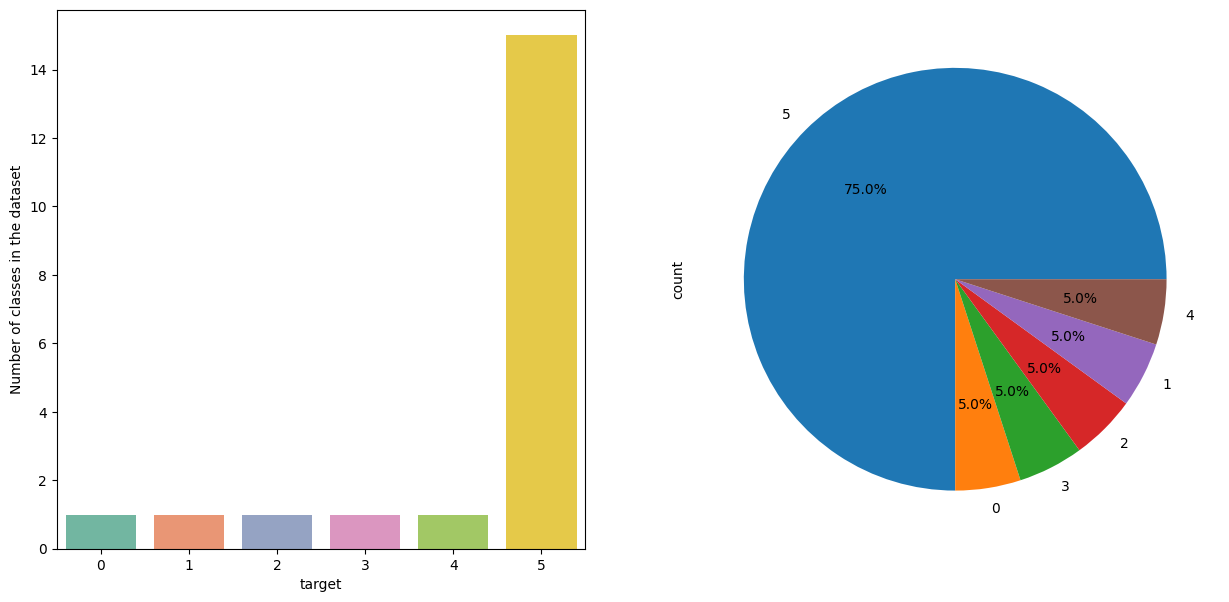

In [10]:
common.show_target_values(all_df, config['TARGET_COLUMN'])

## 5. Bivariate/Multivariate Analysis
* Correlation matrix (for numerical variables)
* Scatter plots (to assess relationships between two numerical variables)
* Pair plots (to visualize relationships across multiple variables)
* Group-wise statistics (e.g., groupby() for summarizing data by category)

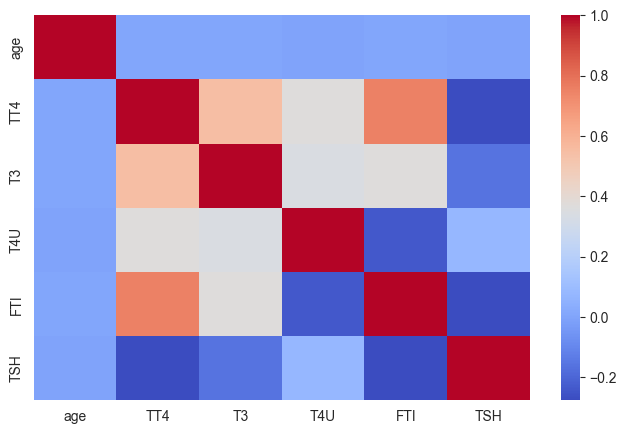

In [64]:
common.show_feature_correlation(num_df)

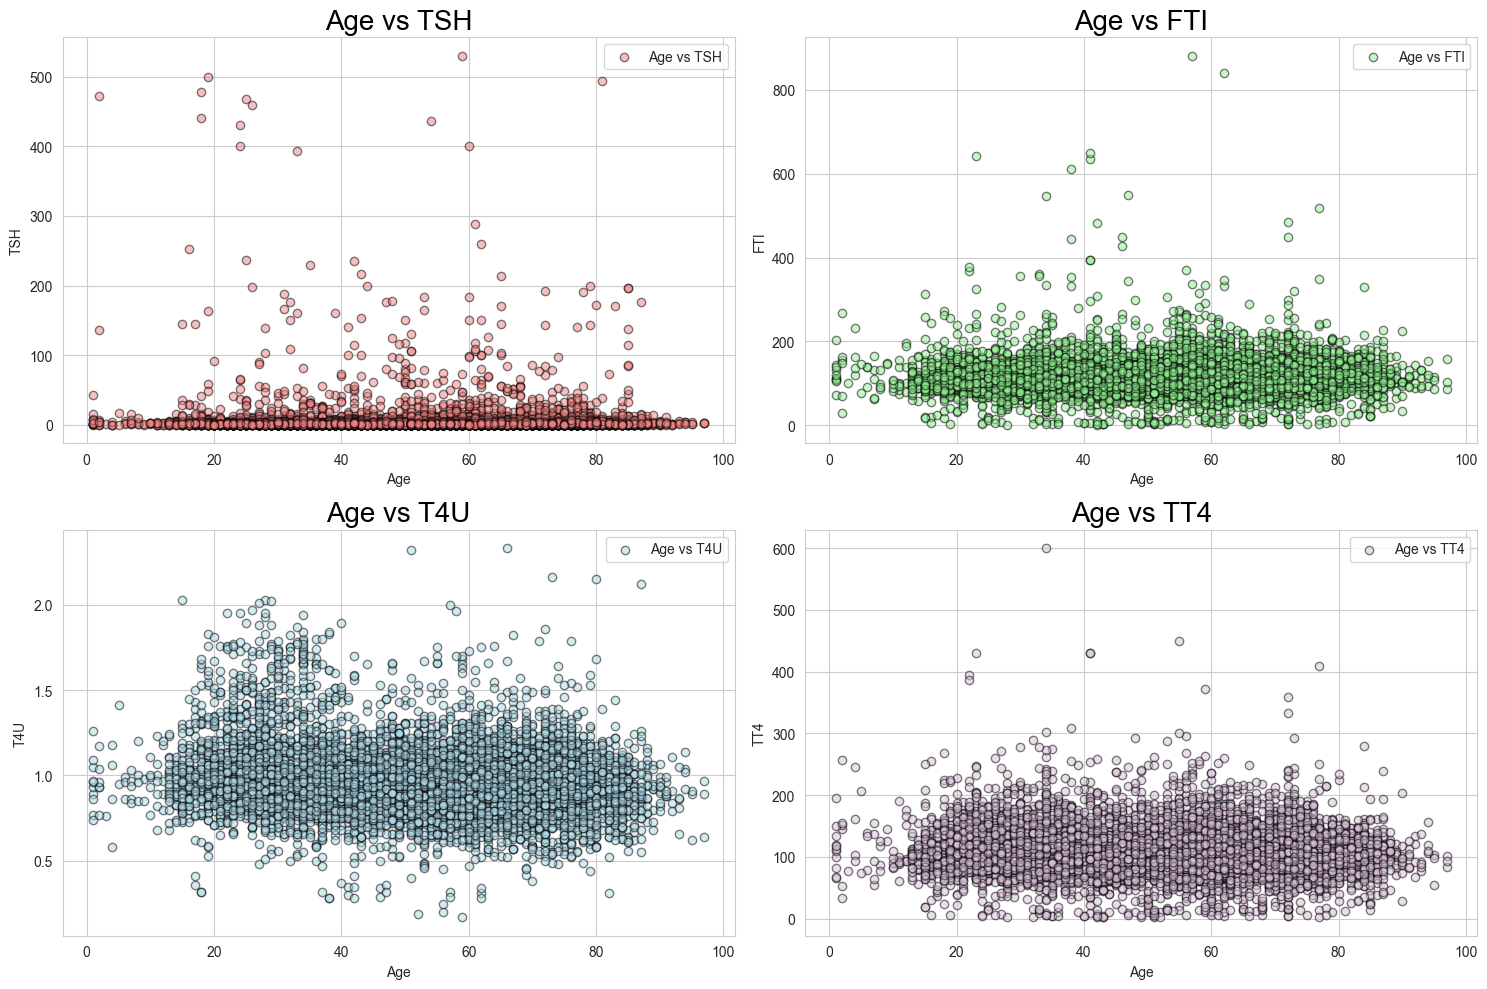

In [78]:
columns_to_plot_scatter = ['TSH', 'FTI', 'T4U', 'TT4']

plt.figure(figsize=(15, 10))
light_colors = ['lightcoral', 'lightgreen', 'lightblue', 'thistle']

for i, (column, color) in enumerate(zip(columns_to_plot_scatter, light_colors), start=1):
    plt.subplot(2, 2, i)
    plt.scatter(all_df['age'], all_df[column], label=f'Age vs {column}', color=color, edgecolors='black', linewidth=1, alpha=0.5)
    plt.xlabel('Age')
    plt.ylabel(column)
    plt.title(f'Age vs {column}', color='black', fontsize=20)
    plt.legend()
plt.tight_layout()
plt.show()